<a href="https://colab.research.google.com/github/sameer203/Tensorflow_/blob/main/13_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Data

In [1]:
import os

ROOT = "/content/drive/MyDrive/Tensorflow"

os.chdir(ROOT)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Tensorflow/BTC_USD_2014-11-02_2021-11-11-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])

In [4]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-02,BTC,325.22633,338.01050,338.12950,319.36700
2014-11-03,BTC,331.60083,325.22633,333.75983,319.04350
2014-11-04,BTC,324.71833,331.60083,332.75133,323.06333
2014-11-05,BTC,332.45666,324.71833,335.81166,320.93333
2014-11-06,BTC,336.58500,332.45666,341.49000,328.56166


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2562 entries, 2014-11-02 to 2021-11-11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2562 non-null   object 
 1   Closing Price (USD)  2562 non-null   float64
 2   24h Open (USD)       2562 non-null   float64
 3   24h High (USD)       2562 non-null   float64
 4   24h Low (USD)        2562 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.1+ KB


In [6]:
len(df)

2562

In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

In [8]:
bitcoin_prices.head()

,Price
Date,
2014-11-02,325.22633
2014-11-03,331.60083
2014-11-04,324.71833
2014-11-05,332.45666
2014-11-06,336.58500


In [9]:
len(bitcoin_prices)

2562

Text(0.5, 1.0, 'BTC historical Data')

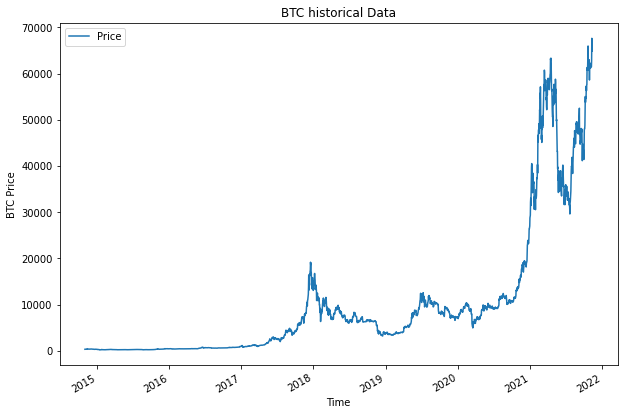

In [10]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

In [11]:
bitcoin_prices = bitcoin_prices.iloc[:-100]

In [13]:
# Deleting last 100 rows
#bitcoin_prices_new = bitcoin_prices.drop(bitcoin_prices.tail(100).index,
                                     #inplace=True)

In [14]:
len(bitcoin_prices)

2462

Text(0.5, 1.0, 'BTC historical Data')

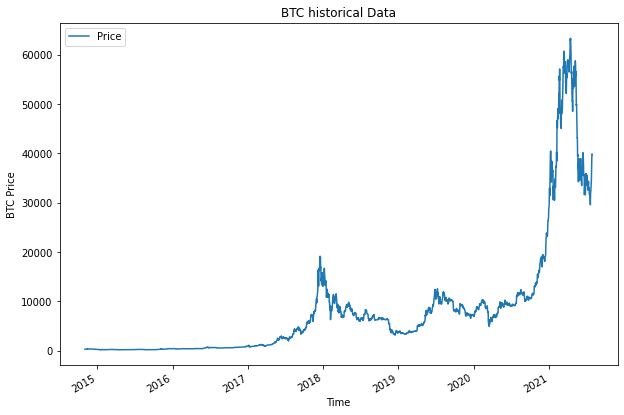

In [15]:
bitcoin_prices.plot(figsize=(10,7))
plt.xlabel("Time")
plt.ylabel("BTC Price")
plt.title("BTC historical Data")

### Train Test split

In [16]:
# bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[-10:], prices[-10:]

(array(['2021-07-21T00:00:00.000000000', '2021-07-22T00:00:00.000000000',
        '2021-07-23T00:00:00.000000000', '2021-07-24T00:00:00.000000000',
        '2021-07-25T00:00:00.000000000', '2021-07-26T00:00:00.000000000',
        '2021-07-27T00:00:00.000000000', '2021-07-28T00:00:00.000000000',
        '2021-07-29T00:00:00.000000000', '2021-07-30T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
        34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
        39917.4493694 , 39810.51797108]))

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1969, 493, 1969, 493)

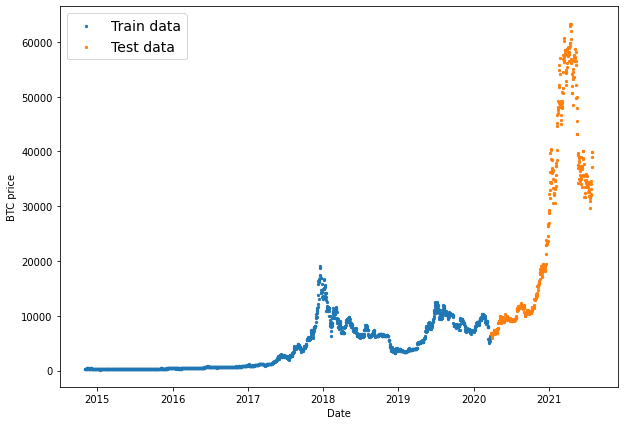

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show()

In [20]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

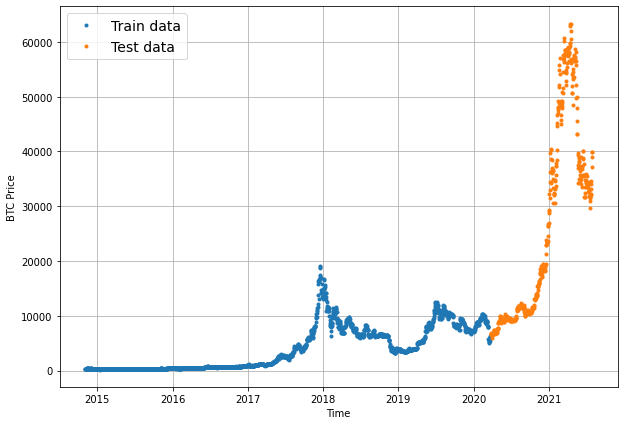

In [21]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Model 0: Navie Forecast (Baseline)

In [22]:
navie_forecast = y_test[:-1]

In [25]:
navie_forecast[:10], navie_forecast[-10:]

(array([6784.31801143, 6706.98508913, 6721.49539238, 6682.7800492 ,
        6229.48834283, 5922.48983509, 6483.73944553, 6446.42134684,
        6537.3364615 , 6850.55871169]),
 array([30940.28728402, 29608.59725347, 32014.43603389, 32203.3656377 ,
        33117.75146222, 34014.618359  , 34574.67066093, 37114.29662368,
        38963.92285736, 39917.4493694 ]))

In [26]:
y_test[-10:]

array([29608.59725347, 32014.43603389, 32203.3656377 , 33117.75146222,
       34014.618359  , 34574.67066093, 37114.29662368, 38963.92285736,
       39917.4493694 , 39810.51797108])